In [1]:
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# taken from: https://chih-ling-hsu.github.io/2018/05/14/NYC
# Download the Trip Record Data, adjust range according to which months
for month in range(1,7):
    urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/trip+data/"+ \
                               "yellow_tripdata_2019-{0:0=2d}.csv".format(month), 
                               "Data/nyc.2019-{0:0=2d}.csv".format(month))

# Download the location Data
urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip", "taxi_zones.zip")
with zipfile.ZipFile("taxi_zones.zip","r") as zip_ref:
    zip_ref.extractall("./shape")
    

In [2]:
#test with 1 file
df = pd.read_csv("data/nyc.2019-06.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0.0,1,N,262,263,2,2.5,3.0,0.5,0.00,0.0,0.3,6.30,2.5
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,17.5,0.5,0.5,0.00,0.0,0.3,18.80,0.0
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30,0.0
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,9.5,3.0,0.5,2.65,0.0,0.3,15.95,2.5


In [11]:

# This is the code to iterate through each CSV file in the director and load them in. 
path = r'Data/'                     
all_files = glob.glob(path + "*.csv")     

df_from_each_file = (pd.read_csv(f) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

In [4]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06,6.941024e+06
mean,1.642546e+00,1.567322e+00,3.078505e+00,1.059386e+00,1.623034e+02,1.608204e+02,1.292040e+00,1.366414e+01,1.164652e+00,4.950010e-01,2.265934e+00,4.061977e-01,2.984860e-01,1.974127e+01,2.274467e+00
std,5.018739e-01,1.210831e+00,1.790048e+01,7.349947e-01,6.638413e+01,7.046478e+01,4.809936e-01,1.323297e+02,1.275345e+00,1.008513e-01,2.962398e+00,1.797505e+00,2.854512e-02,1.326798e+02,7.289606e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.050000e+02,-2.650000e+01,-5.000000e-01,-8.888000e+01,-3.974000e+01,-3.000000e-01,-3.058000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.680000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,9.500000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.480000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,3.140000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.130000e+01,2.500000e+00
max,4.000000e+00,9.000000e+00,4.597722e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.469500e+05,8.476000e+01,2.124200e+02,1.624640e+03,8.230000e+02,3.000000e-01,3.470350e+05,2.750000e+00


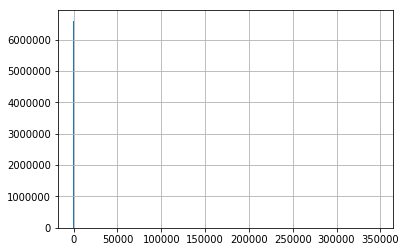

In [5]:
df['fare_amount'].hist(bins=1000)

In [6]:
clean_df = df[df['fare_amount']>0 ]

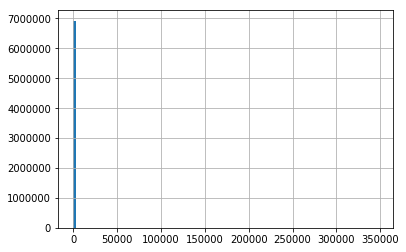

In [7]:
clean_df['fare_amount'].hist(bins=100)

In [8]:
clean_df = clean_df[clean_df['fare_amount']<500 ]

Text(0, 0.5, 'Rides')

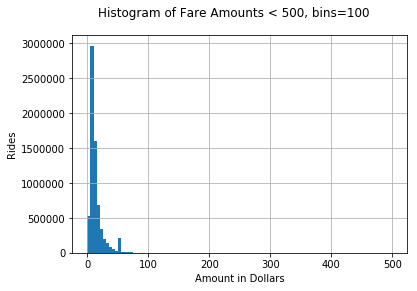

In [9]:
clean_df['fare_amount'].hist(bins=100)

plt.suptitle("Histogram of Fare Amounts < 500, bins=100")
plt.xlabel("Amount in Dollars")
plt.ylabel("Rides")

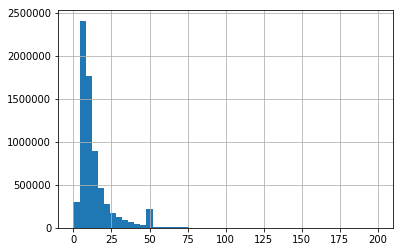

In [10]:
clean_df = df[(df['fare_amount']<200) & (df['fare_amount']>0) ]
clean_df['fare_amount'].hist(bins=50)

Text(0, 0.5, 'Rides')

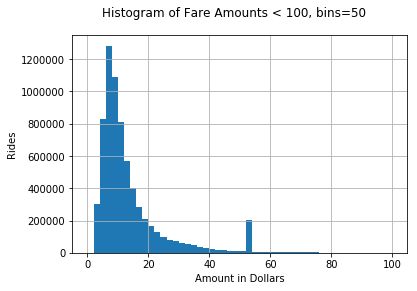

In [11]:
clean_df = df[(df['fare_amount']<100) & (df['fare_amount']>0) ]
clean_df['fare_amount'].hist(bins=50)
plt.suptitle("Histogram of Fare Amounts < 100, bins=50")
plt.xlabel("Amount in Dollars")
plt.ylabel("Rides")

In [12]:
clean_df['passenger_count'].value_counts()

1    4836995
2    1057853
3     304237
5     280640
6     168649
4     140175
0     127854
7         46
9         27
8         17
Name: passenger_count, dtype: int64

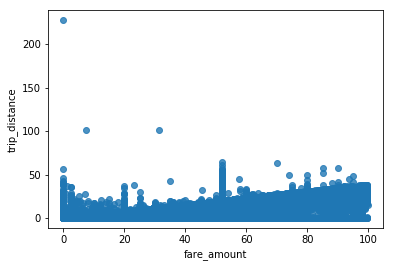

In [13]:
sns.regplot(x=clean_df["fare_amount"], y=clean_df["trip_distance"], fit_reg=False)


Text(0, 0.5, 'Rides')

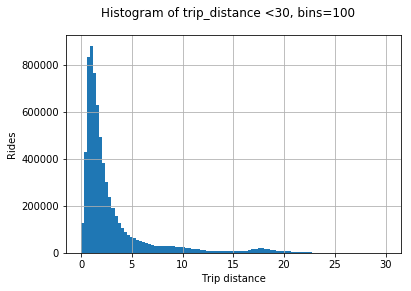

In [14]:
clean_df = df[(df['fare_amount']<200) & (df['fare_amount']>0) & (df['trip_distance']<30)]
clean_df['trip_distance'].hist(bins=100)
plt.suptitle("Histogram of trip_distance <30, bins=100")
plt.xlabel("Trip distance")
plt.ylabel("Rides")

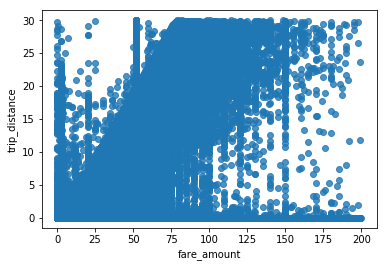

In [15]:
sns.regplot(x=clean_df["fare_amount"], y=clean_df["trip_distance"], fit_reg=False)



In [16]:
# take sample fraction of 1%
clean_df_sample = clean_df.sample(frac=0.01, replace=True, random_state=1)

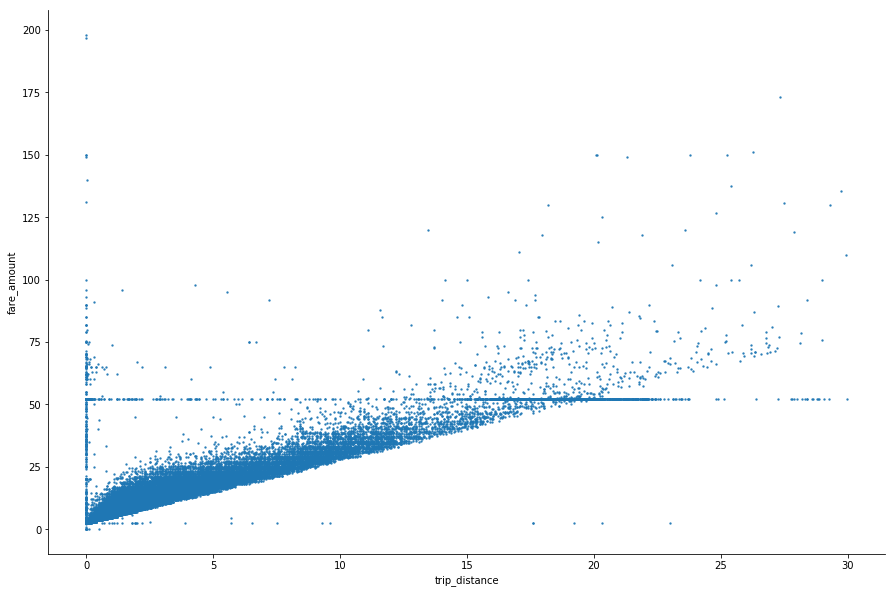

In [17]:
g = sns.regplot(y=clean_df_sample["fare_amount"], x=clean_df_sample["trip_distance"], fit_reg=False, scatter_kws={'s':2})

g.figure.set_size_inches(15, 10)
sns.despine()

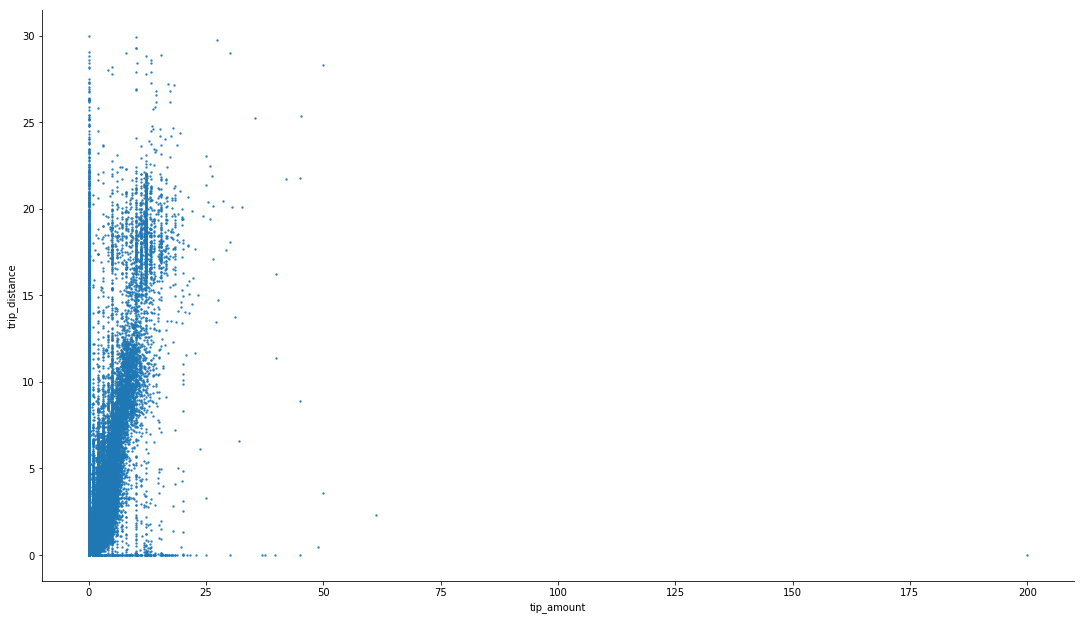

In [18]:
g = sns.regplot(x=clean_df_sample["tip_amount"], y=clean_df_sample["trip_distance"], fit_reg=False, scatter_kws={'s':2})

g.figure.set_size_inches(18.5, 10.5)
sns.despine()

In [19]:
clean_df_sample["%tip"] = clean_df_sample["tip_amount"]/clean_df_sample["total_amount"]

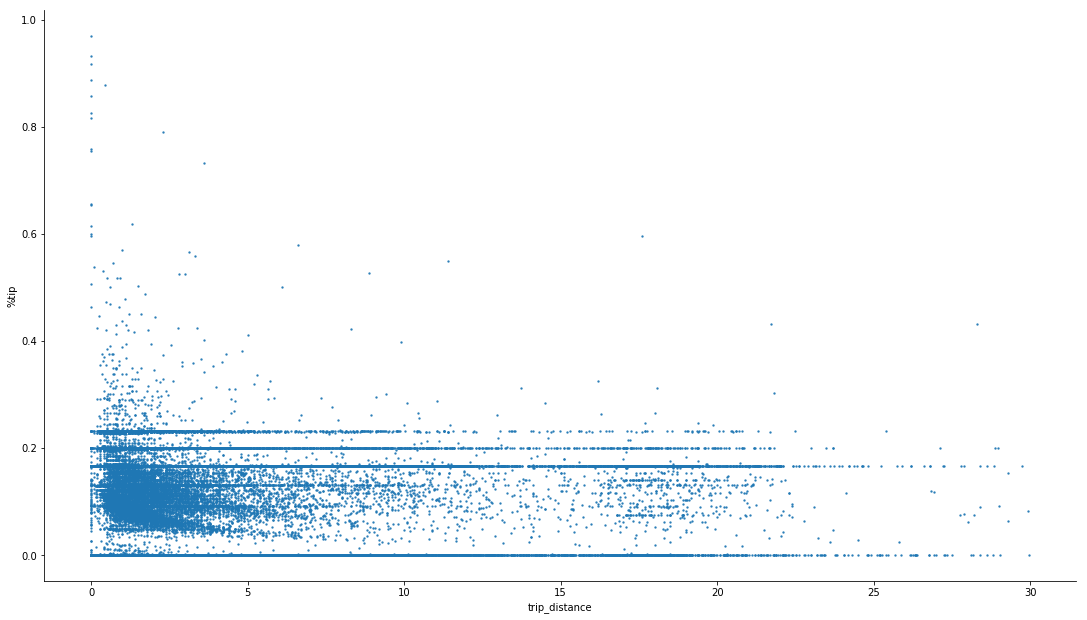

In [20]:
g = sns.regplot(y=clean_df_sample["%tip"], x=clean_df_sample["trip_distance"], fit_reg=False, scatter_kws={'s':2})

g.figure.set_size_inches(18.5, 10.5)
sns.despine()

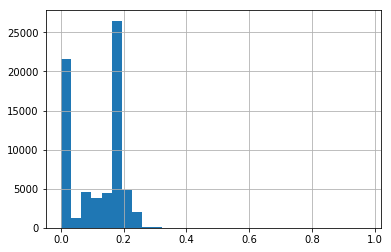

In [21]:
clean_df_sample['%tip'].hist(bins=30)

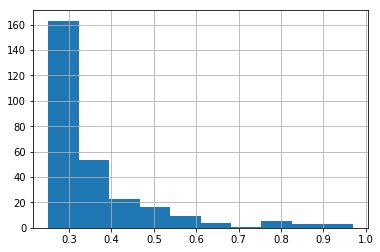

In [22]:

#looking for rare cases where %tip is high

df_plot = clean_df_sample[(clean_df_sample['%tip']>0.25)]

df_plot['%tip'].hist(bins=10)


In [23]:
# Calculate frequency counts for different ranges of % tip?

# are there specific locations or patterns for the data?

# hour of day? morning vs. evening?

In [24]:
dfhvfhv = pd.read_csv("data/fhvhv_tripdata_2019-06.csv")
dfhvfhv.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,HV0002,B03035,2019-06-01 00:40:55,2019-06-01 01:03:58,256,87,NaN
1,HV0005,B02510,2019-06-01 00:04:47,2019-06-01 00:25:53,163,265,NaN
2,HV0005,B02510,2019-06-01 00:48:00,2019-06-01 00:59:49,132,216,1.0
3,HV0002,B03035,2019-06-01 00:59:25,2019-06-01 01:04:07,152,116,NaN
4,HV0003,B02682,2019-06-01 00:05:11,2019-06-01 00:23:35,148,233,NaN


In [25]:
# take sample fraction of 1%
dfhvfhv_sample = dfhvfhv.sample(frac=0.01, replace=True, random_state=1)

In [26]:
dfhvfhv.describe()

,PULocationID,DOLocationID,SR_Flag
count,2.100191e+07,2.100191e+07,3049368.0
mean,1.385033e+02,1.415051e+02,1.0
std,7.535957e+01,7.778222e+01,0.0
min,1.000000e+00,1.000000e+00,1.0
25%,7.400000e+01,7.500000e+01,1.0
50%,1.400000e+02,1.410000e+02,1.0
75%,2.110000e+02,2.170000e+02,1.0
max,2.650000e+02,2.650000e+02,1.0


In [27]:
dfhvfhv_sample.describe()

,PULocationID,DOLocationID,SR_Flag
count,210019.000000,210019.000000,30364.0
mean,138.718168,141.979526,1.0
std,75.469101,77.684747,0.0
min,1.000000,1.000000,1.0
25%,74.000000,75.000000,1.0
50%,140.000000,142.000000,1.0
75%,211.000000,218.000000,1.0
max,265.000000,265.000000,1.0


In [28]:
company = {
'HV0002': "Juno",
'HV0003': "Uber",
'HV0004': "Via",
'HV0005': "Lyft"
}

dfhvfhv['Company'] = dfhvfhv.hvfhs_license_num.map(company)

dfhvfhv.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Company
0,HV0002,B03035,2019-06-01 00:40:55,2019-06-01 01:03:58,256,87,NaN,Juno
1,HV0005,B02510,2019-06-01 00:04:47,2019-06-01 00:25:53,163,265,NaN,Lyft
2,HV0005,B02510,2019-06-01 00:48:00,2019-06-01 00:59:49,132,216,1.0,Lyft
3,HV0002,B03035,2019-06-01 00:59:25,2019-06-01 01:04:07,152,116,NaN,Juno
4,HV0003,B02682,2019-06-01 00:05:11,2019-06-01 00:23:35,148,233,NaN,Uber


In [29]:
from datetime import datetime


In [30]:
dfhvfhv['pickup_datetime_dt'] =  pd.to_datetime(dfhvfhv['pickup_datetime'])
dfhvfhv['dropoff_datetime_dt'] =  pd.to_datetime(dfhvfhv['dropoff_datetime'])

In [31]:
dfhvfhv['time'] = dfhvfhv['dropoff_datetime_dt'] - dfhvfhv['pickup_datetime_dt']

In [32]:
dfhvfhv.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Company,pickup_datetime_dt,dropoff_datetime_dt,time
0,HV0002,B03035,2019-06-01 00:40:55,2019-06-01 01:03:58,256,87,NaN,Juno,2019-06-01 00:40:55,2019-06-01 01:03:58,00:23:03
1,HV0005,B02510,2019-06-01 00:04:47,2019-06-01 00:25:53,163,265,NaN,Lyft,2019-06-01 00:04:47,2019-06-01 00:25:53,00:21:06
2,HV0005,B02510,2019-06-01 00:48:00,2019-06-01 00:59:49,132,216,1.0,Lyft,2019-06-01 00:48:00,2019-06-01 00:59:49,00:11:49
3,HV0002,B03035,2019-06-01 00:59:25,2019-06-01 01:04:07,152,116,NaN,Juno,2019-06-01 00:59:25,2019-06-01 01:04:07,00:04:42
4,HV0003,B02682,2019-06-01 00:05:11,2019-06-01 00:23:35,148,233,NaN,Uber,2019-06-01 00:05:11,2019-06-01 00:23:35,00:18:24


In [33]:
dfhvfhv['time_m'] = dfhvfhv['time'].dt.total_seconds().div(60).astype(float)

In [34]:
dfhvfhv.groupby('Company')['time_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Juno,674839.0,17.653449,13.253488,0.216667,8.416667,14.133333,22.883333,239.633333
Lyft,4999262.0,20.515750,15.439130,0.000000,10.283333,16.450000,26.150000,597.566667
Uber,14397094.0,19.416409,14.375523,0.000000,9.750000,15.533333,24.666667,733.783333
Via,930716.0,21.819479,13.741927,0.000000,12.666667,19.250000,28.050000,1418.383333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a97516438>,
      dtype=object)

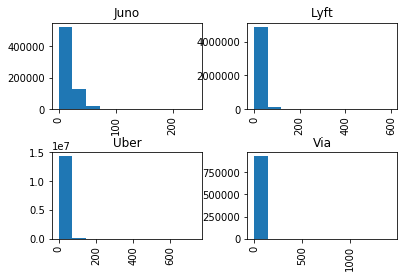

In [35]:
dfhvfhv['time_m'].hist(by=dfhvfhv['Company'])

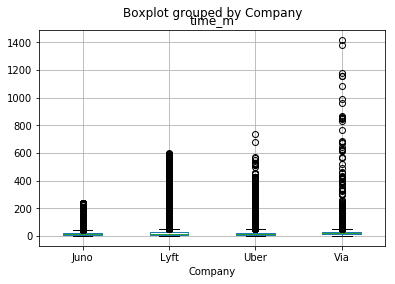

In [36]:
dfhvfhv.boxplot(column=['time_m'], by='Company')

In [37]:
# appears to be a lot of outliers so let's take out anything >120mins and also take out shared rides

clean_dfhvfhv = dfhvfhv[(dfhvfhv['time_m']<120) & (dfhvfhv['SR_Flag']!=1)]

In [38]:
clean_dfhvfhv.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Company,pickup_datetime_dt,dropoff_datetime_dt,time,time_m
0,HV0002,B03035,2019-06-01 00:40:55,2019-06-01 01:03:58,256,87,NaN,Juno,2019-06-01 00:40:55,2019-06-01 01:03:58,00:23:03,23.05
1,HV0005,B02510,2019-06-01 00:04:47,2019-06-01 00:25:53,163,265,NaN,Lyft,2019-06-01 00:04:47,2019-06-01 00:25:53,00:21:06,21.10
3,HV0002,B03035,2019-06-01 00:59:25,2019-06-01 01:04:07,152,116,NaN,Juno,2019-06-01 00:59:25,2019-06-01 01:04:07,00:04:42,4.70
4,HV0003,B02682,2019-06-01 00:05:11,2019-06-01 00:23:35,148,233,NaN,Uber,2019-06-01 00:05:11,2019-06-01 00:23:35,00:18:24,18.40
5,HV0003,B02682,2019-06-01 00:31:14,2019-06-01 00:49:11,233,148,NaN,Uber,2019-06-01 00:31:14,2019-06-01 00:49:11,00:17:57,17.95


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a234c2d30>,
      dtype=object)

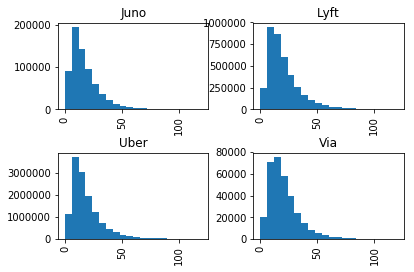

In [39]:
clean_dfhvfhv['time_m'].hist(by=dfhvfhv['Company'],bins=20)

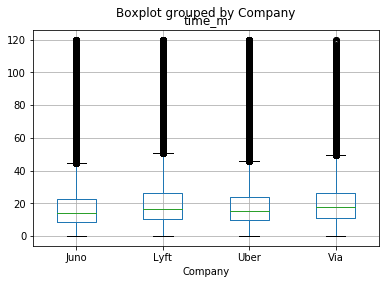

In [40]:
clean_dfhvfhv.boxplot(column=['time_m'], by='Company')

In [41]:
clean_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [42]:
clean_dfhvfhv.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'SR_Flag',
       'Company', 'pickup_datetime_dt', 'dropoff_datetime_dt', 'time',
       'time_m'],
      dtype='object')

In [43]:

clean_df['tpep_pickup_datetime_dt'] =  pd.to_datetime( clean_df['tpep_pickup_datetime'])
clean_df['tpep_dropoff_datetime_dt']  =  pd.to_datetime(clean_df['tpep_dropoff_datetime'])

clean_df['time'] = clean_df['tpep_dropoff_datetime_dt'] - clean_df['tpep_pickup_datetime_dt']


/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [44]:
clean_df['time_m'] = clean_df['time'].dt.total_seconds().div(60).astype(float)

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
clean_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_datetime_dt,tpep_dropoff_datetime_dt,time,time_m
0,1,2019-06-01 00:55:13,2019-06-01 00:56:17,1,0.0,1,N,145,145,2,...,0.5,0.00,0.0,0.3,4.30,0.0,2019-06-01 00:55:13,2019-06-01 00:56:17,00:01:04,1.066667
1,1,2019-06-01 00:06:31,2019-06-01 00:06:52,1,0.0,1,N,262,263,2,...,0.5,0.00,0.0,0.3,6.30,2.5,2019-06-01 00:06:31,2019-06-01 00:06:52,00:00:21,0.350000
2,1,2019-06-01 00:17:05,2019-06-01 00:36:38,1,4.4,1,N,74,7,2,...,0.5,0.00,0.0,0.3,18.80,0.0,2019-06-01 00:17:05,2019-06-01 00:36:38,00:19:33,19.550000
3,1,2019-06-01 00:59:02,2019-06-01 00:59:12,0,0.8,1,N,145,145,2,...,0.5,0.00,0.0,0.3,4.30,0.0,2019-06-01 00:59:02,2019-06-01 00:59:12,00:00:10,0.166667
4,1,2019-06-01 00:03:25,2019-06-01 00:15:42,1,1.7,1,N,113,148,1,...,0.5,2.65,0.0,0.3,15.95,2.5,2019-06-01 00:03:25,2019-06-01 00:15:42,00:12:17,12.283333


In [46]:
clean_df['time_m'].describe()

count    6.919665e+06
mean     1.870055e+01
std      7.206179e+01
min     -4.279383e+03
25%      6.883333e+00
50%      1.160000e+01
75%      1.916667e+01
max      1.503383e+03
Name: time_m, dtype: float64

In [47]:
dfyelltime = clean_df[['tpep_pickup_datetime_dt','tpep_dropoff_datetime_dt','PULocationID','DOLocationID','time','time_m']].copy()

In [48]:
dfyelltime = dfyelltime[(dfyelltime['time_m']>0) & (dfyelltime['time_m']<120)]

In [49]:
dfyelltime['time_m'].describe()

count    6.891805e+06
mean     1.504523e+01
std      1.239821e+01
min      1.666667e-02
25%      6.883333e+00
50%      1.158333e+01
75%      1.908333e+01
max      1.199833e+02
Name: time_m, dtype: float64

In [50]:
dfyelltime['Company'] = 'Yellow'
dfyelltime.head()

,tpep_pickup_datetime_dt,tpep_dropoff_datetime_dt,PULocationID,DOLocationID,time,time_m,Company
0,2019-06-01 00:55:13,2019-06-01 00:56:17,145,145,00:01:04,1.066667,Yellow
1,2019-06-01 00:06:31,2019-06-01 00:06:52,262,263,00:00:21,0.350000,Yellow
2,2019-06-01 00:17:05,2019-06-01 00:36:38,74,7,00:19:33,19.550000,Yellow
3,2019-06-01 00:59:02,2019-06-01 00:59:12,145,145,00:00:10,0.166667,Yellow
4,2019-06-01 00:03:25,2019-06-01 00:15:42,113,148,00:12:17,12.283333,Yellow


In [51]:
dfyelltime.rename(columns={'tpep_pickup_datetime_dt': 'pickup_datetime_dt','tpep_dropoff_datetime_dt': 'dropoff_datetime_dt'}
                  , inplace=True)

In [52]:
dfyelltime.head()

,pickup_datetime_dt,dropoff_datetime_dt,PULocationID,DOLocationID,time,time_m,Company
0,2019-06-01 00:55:13,2019-06-01 00:56:17,145,145,00:01:04,1.066667,Yellow
1,2019-06-01 00:06:31,2019-06-01 00:06:52,262,263,00:00:21,0.350000,Yellow
2,2019-06-01 00:17:05,2019-06-01 00:36:38,74,7,00:19:33,19.550000,Yellow
3,2019-06-01 00:59:02,2019-06-01 00:59:12,145,145,00:00:10,0.166667,Yellow
4,2019-06-01 00:03:25,2019-06-01 00:15:42,113,148,00:12:17,12.283333,Yellow


In [53]:
clean_dfhvfhv.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Company,pickup_datetime_dt,dropoff_datetime_dt,time,time_m
0,HV0002,B03035,2019-06-01 00:40:55,2019-06-01 01:03:58,256,87,NaN,Juno,2019-06-01 00:40:55,2019-06-01 01:03:58,00:23:03,23.05
1,HV0005,B02510,2019-06-01 00:04:47,2019-06-01 00:25:53,163,265,NaN,Lyft,2019-06-01 00:04:47,2019-06-01 00:25:53,00:21:06,21.10
3,HV0002,B03035,2019-06-01 00:59:25,2019-06-01 01:04:07,152,116,NaN,Juno,2019-06-01 00:59:25,2019-06-01 01:04:07,00:04:42,4.70
4,HV0003,B02682,2019-06-01 00:05:11,2019-06-01 00:23:35,148,233,NaN,Uber,2019-06-01 00:05:11,2019-06-01 00:23:35,00:18:24,18.40
5,HV0003,B02682,2019-06-01 00:31:14,2019-06-01 00:49:11,233,148,NaN,Uber,2019-06-01 00:31:14,2019-06-01 00:49:11,00:17:57,17.95


In [54]:
clean_dfhvfhv_copy = clean_dfhvfhv[['pickup_datetime_dt','dropoff_datetime_dt',
                                   'PULocationID','DOLocationID',
                                   'time','time_m', 'Company']]

In [55]:
clean_dfhvfhv_copy.head()

,pickup_datetime_dt,dropoff_datetime_dt,PULocationID,DOLocationID,time,time_m,Company
0,2019-06-01 00:40:55,2019-06-01 01:03:58,256,87,00:23:03,23.05,Juno
1,2019-06-01 00:04:47,2019-06-01 00:25:53,163,265,00:21:06,21.10,Lyft
3,2019-06-01 00:59:25,2019-06-01 01:04:07,152,116,00:04:42,4.70,Juno
4,2019-06-01 00:05:11,2019-06-01 00:23:35,148,233,00:18:24,18.40,Uber
5,2019-06-01 00:31:14,2019-06-01 00:49:11,233,148,00:17:57,17.95,Uber


In [56]:
dftimecompany = dfyelltime.append(clean_dfhvfhv_copy)

In [57]:
dftimecompany.groupby('Company')['time_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Juno,674538.0,17.592756,12.921119,0.216667,8.416667,14.116667,22.866667,119.833333
Lyft,3797675.0,20.796543,14.803226,0.050000,10.533333,16.766667,26.550000,119.983333
Uber,13142087.0,19.036456,14.016652,0.000000,9.533333,15.133333,24.083333,119.983333
Via,324155.0,20.622872,13.459082,0.000000,11.250000,17.566667,26.466667,119.633333
Yellow,6891805.0,15.045225,12.398212,0.016667,6.883333,11.583333,19.083333,119.983333


In [58]:
dftimecompany[dftimecompany['time_m']>0].groupby('Company')['time_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Juno,674538.0,17.592756,12.921119,0.216667,8.416667,14.116667,22.866667,119.833333
Lyft,3797675.0,20.796543,14.803226,0.050000,10.533333,16.766667,26.550000,119.983333
Uber,13142058.0,19.036498,14.016639,0.016667,9.533333,15.133333,24.083333,119.983333
Via,323562.0,20.660668,13.442395,0.016667,11.283333,17.583333,26.500000,119.633333
Yellow,6891805.0,15.045225,12.398212,0.016667,6.883333,11.583333,19.083333,119.983333


In [59]:
#take smaller sample
df_sample = dftimecompany[['time_m','Company']].sample(n=1000, random_state=1)
df_sample.describe()

,time_m
count,1000.000000
mean,18.650633
std,14.059209
min,2.383333
25%,9.079167
50%,14.983333
75%,23.600000
max,113.066667


In [60]:
df_sample.groupby('Company')['time_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Juno,19.0,19.511404,16.486067,4.883333,9.241667,14.483333,20.783333,55.950000
Lyft,162.0,21.057202,15.632290,3.400000,11.175000,17.058333,24.995833,102.933333
Uber,542.0,19.497478,13.670037,2.383333,10.204167,15.550000,24.729167,113.066667
Via,12.0,17.445833,8.437692,6.333333,9.983333,17.200000,21.270833,33.816667
Yellow,265.0,15.440252,13.379473,2.700000,7.016667,12.083333,19.016667,107.116667


In [61]:
from scipy import stats

In [62]:
#two-sample t-test to test if two means are different
rvs1 = df_sample[(df_sample['Company']=='Uber')]
rvs2 = df_sample[(df_sample['Company']=='Yellow')]
stats.ttest_ind(rvs1['time_m'], rvs2['time_m'],equal_var = False)

Ttest_indResult(statistic=4.016684304777138, pvalue=6.748292735907576e-05)

In [63]:
#two-sample t-test to test if two means are different
rvs1 = dftimecompany[(dftimecompany['Company']=='Uber')]
rvs2 = dftimecompany[(dftimecompany['Company']=='Yellow')]
stats.ttest_ind(rvs1['time_m'], rvs2['time_m'],equal_var = False)

Ttest_indResult(statistic=653.9176075170478, pvalue=0.0)

In [64]:
# test for drop offs at jfk
dftimecompany = dfyelltime.append(clean_dfhvfhv_copy)
df_jfk = dftimecompany[(dftimecompany['DOLocationID']==132)]

In [65]:
df_jfk[['PULocationID','time_m']].groupby('PULocationID').count()

,time_m
PULocationID,
3,229
4,1216
5,23
6,75
7,3527
8,6
9,450
10,6055
11,164


In [66]:
df_jfk[['PULocationID','time_m']].groupby('PULocationID')['PULocationID'].count().nlargest(10)

PULocationID
132    21077
216    12168
230    11802
161     9304
164     8895
170     8472
138     8228
162     8093
48      7703
163     6976
Name: PULocationID, dtype: int64

In [67]:
# LocationID 230 represents TimesSq/Theatre District so we'll filter on this
df_TSJFK = df_jfk[(df_jfk['PULocationID']==230)]

In [68]:
df_TSJFK.head()

,pickup_datetime_dt,dropoff_datetime_dt,PULocationID,DOLocationID,time,time_m,Company
27855,2019-06-01 02:26:22,2019-06-01 02:57:51,230,132,00:31:29,31.483333,Yellow
30767,2019-06-01 03:32:45,2019-06-01 03:58:58,230,132,00:26:13,26.216667,Yellow
32604,2019-06-01 03:01:24,2019-06-01 03:38:52,230,132,00:37:28,37.466667,Yellow
32997,2019-06-01 04:14:53,2019-06-01 04:43:46,230,132,00:28:53,28.883333,Yellow
34135,2019-06-01 04:52:15,2019-06-01 05:18:24,230,132,00:26:09,26.150000,Yellow


In [69]:
df_TSJFK.groupby('Company')['time_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Juno,40.0,56.066250,12.764379,26.966667,47.954167,56.675000,65.270833,87.900000
Lyft,1416.0,58.139642,20.560290,24.133333,41.395833,55.525000,70.533333,119.650000
Uber,5844.0,60.463957,20.879915,24.616667,44.108333,57.891667,73.808333,119.733333
Via,37.0,65.408108,22.699868,33.366667,46.250000,59.650000,87.783333,108.316667
Yellow,4465.0,56.467887,19.229711,0.066667,42.783333,54.250000,68.366667,118.900000


In [70]:
#exclude outliers

df_TSJFK = df_TSJFK[(df_TSJFK['time_m']>20)]

df_TSJFK.groupby('Company')['time_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Juno,40.0,56.066250,12.764379,26.966667,47.954167,56.675000,65.270833,87.900000
Lyft,1416.0,58.139642,20.560290,24.133333,41.395833,55.525000,70.533333,119.650000
Uber,5844.0,60.463957,20.879915,24.616667,44.108333,57.891667,73.808333,119.733333
Via,37.0,65.408108,22.699868,33.366667,46.250000,59.650000,87.783333,108.316667
Yellow,4459.0,56.535023,19.153923,21.633333,42.833333,54.283333,68.391667,118.900000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20374358>,
      dtype=object)

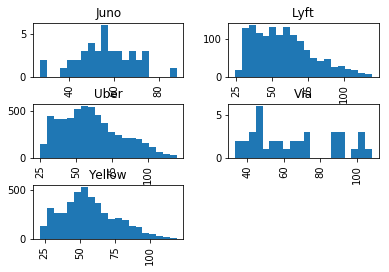

In [71]:
df_TSJFK['time_m'].hist(by=df_TSJFK['Company'],bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9c14a8>,
      dtype=object)

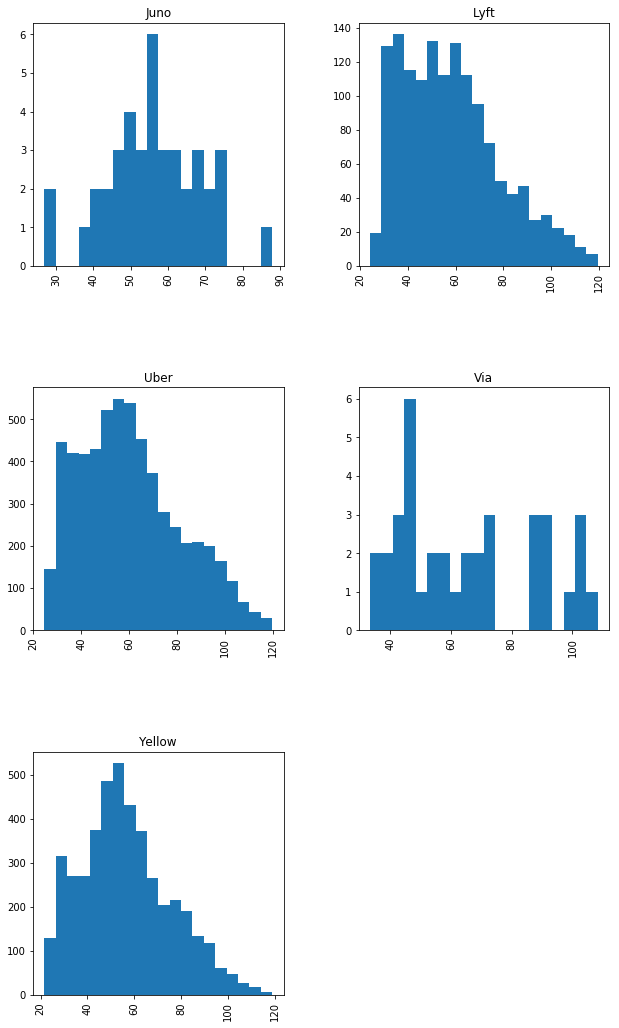

In [72]:
df_TSJFK['time_m'].hist(by=df_TSJFK['Company'],bins=20, figsize = (10,18))

Text(0.5, 0.98, '')

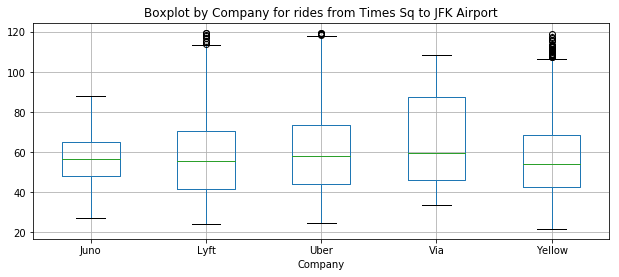

In [73]:
df_TSJFK.boxplot(column=['time_m'], by='Company', figsize = (10,4))

plt.title('Boxplot by Company for rides from Times Sq to JFK Airport' )
plt.suptitle('')

In [74]:
dfhvfhv.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Company,pickup_datetime_dt,dropoff_datetime_dt,time,time_m
0,HV0002,B03035,2019-06-01 00:40:55,2019-06-01 01:03:58,256,87,NaN,Juno,2019-06-01 00:40:55,2019-06-01 01:03:58,00:23:03,23.050000
1,HV0005,B02510,2019-06-01 00:04:47,2019-06-01 00:25:53,163,265,NaN,Lyft,2019-06-01 00:04:47,2019-06-01 00:25:53,00:21:06,21.100000
2,HV0005,B02510,2019-06-01 00:48:00,2019-06-01 00:59:49,132,216,1.0,Lyft,2019-06-01 00:48:00,2019-06-01 00:59:49,00:11:49,11.816667
3,HV0002,B03035,2019-06-01 00:59:25,2019-06-01 01:04:07,152,116,NaN,Juno,2019-06-01 00:59:25,2019-06-01 01:04:07,00:04:42,4.700000
4,HV0003,B02682,2019-06-01 00:05:11,2019-06-01 00:23:35,148,233,NaN,Uber,2019-06-01 00:05:11,2019-06-01 00:23:35,00:18:24,18.400000


In [75]:
#two-sample t-test to test if two means are different
rvs1 = df_TSJFK[(df_TSJFK['Company']=='Uber')]
rvs2 = df_TSJFK[(df_TSJFK['Company']=='Yellow')]
stats.ttest_ind(rvs1['time_m'], rvs2['time_m'],equal_var = False)

Ttest_indResult(statistic=9.919579758124092, pvalue=4.3777705013669846e-23)

In [76]:
#two-sample t-test to test if two means are different
rvs1 = df_TSJFK[(df_TSJFK['Company']=='Via')]
rvs2 = df_TSJFK[(df_TSJFK['Company']=='Uber')]
stats.ttest_ind(rvs1['time_m'], rvs2['time_m'],equal_var = False)

Ttest_indResult(statistic=1.3213234275322348, pvalue=0.19464231769328272)

In [77]:
# next step is to test for more locations to see if we see the same conclusions that Yellow taxis are quicker

In [78]:
#let's start with all journeys to JFK ?

df_jfk.head()

,pickup_datetime_dt,dropoff_datetime_dt,PULocationID,DOLocationID,time,time_m,Company
349,2019-06-01 00:17:11,2019-06-01 00:18:24,132,132,00:01:13,1.216667,Yellow
1118,2019-06-01 00:09:40,2019-06-01 00:16:24,132,132,00:06:44,6.733333,Yellow
1213,2019-06-01 00:20:06,2019-06-01 00:59:52,87,132,00:39:46,39.766667,Yellow
1307,2019-06-01 00:03:07,2019-06-01 00:46:04,261,132,00:42:57,42.950000,Yellow
2443,2019-06-01 00:11:45,2019-06-01 00:50:09,170,132,00:38:24,38.400000,Yellow


In [79]:
# uber, lyft and yellow only...
company =  ['Yellow','Uber']
df_jfk_ULY = df_jfk[df_jfk.Company.isin(company)]

In [80]:
df_jfk_ULY.groupby(['PULocationID','Company'])['time_m'].describe()

count       mean        std        min        25%  \
PULocationID Company                                                       
3            Uber      165.0  39.162323  11.884556  22.450000  30.350000   
4            Uber      765.0  50.447778  18.355632  24.166667  36.066667   
             Yellow     55.0  53.023939  19.760940  22.466667  40.675000   
5            Uber       18.0  70.984259  21.237888  45.583333  55.816667   
6            Uber       59.0  44.150000  17.018041  27.050000  31.858333   
7            Uber     2087.0  35.349641  13.166746  16.466667  25.416667   
             Yellow     68.0  38.172549  15.577116  17.600000  25.541667   
8            Uber        3.0  41.138889  18.450025  23.950000  31.391667   
9            Uber      335.0  27.331791   7.541530  14.383333  21.600000   
             Yellow      2.0  30.900000   2.027039  29.466667  30.183333   
10           Uber     4432.0   9.863752   4.204920   2.250000   7.350000   
             Yellow     26.0   8.482692   3.307028   2.650000   6.295833   
11           Uber      110.0  35.970909  13.528330  20.050000  26.937500   
12           Uber       18.0  73.980556  20.524069  39.800000  60.558333   
             Yellow     23.0  74.781884  21.485715  41.566667  53.025000   
13           Uber     1530.0  60.669619  20.426264  27.766667  43.133333   
             Yellow    865.0  58.599461  19.354328  25.500000  42.633333   
14           Uber      848.0  43.233078  16.461623  22.900000  30.683333   
             Yellow      3.0  28.750000   4.966751  23.766667  26.275000   
15           Uber      228.0  31.092178   9.488888  17.950000  23.812500   
16           Uber      464.0  27.734950   7.286135  15.850000  22.466667   
17           Uber     1967.0  39.559888   9.516788  22.066667  32.750000   
             Yellow      3.0  33.411111   7.123637  26.033333  29.991667   
18           Uber      194.0  44.038144  14.351500  26.033333  33.145833   
             Yellow      1.0  38.300000        NaN  38.300000  38.300000   
19           Uber      375.0  20.235111   5.730756  11.883333  16.458333   
             Yellow      1.0  11.516667        NaN  11.516667  11.516667   
20           Uber      156.0  45.582265  16.757654  25.083333  31.612500   
             Yellow      1.0  41.350000        NaN  41.350000  41.350000   
21           Uber      247.0  37.021660  11.963528  21.633333  28.041667   
...                      ...        ...        ...        ...        ...   
248          Uber      126.0  36.607540  12.585025  21.400000  26.033333   
249          Uber     1927.0  58.960491  20.386943  25.950000  42.733333   
             Yellow    462.0  56.208983  19.721492   5.816667  41.162500   
250          Uber      113.0  37.252212  13.807947  20.816667  26.233333   
             Yellow      1.0  30.450000        NaN  30.450000  30.450000   
251          Uber       49.0  54.441156  18.653796  28.816667  37.833333   
252          Uber      328.0  31.325203  10.486672  13.883333  23.262500   
253          Uber        9.0  31.787037  14.289652  11.500000  24.900000   
254          Uber      205.0  44.231463  15.531668  25.483333  32.583333   
             Yellow      1.0  40.766667        NaN  40.766667  40.766667   
255          Uber     4007.0  47.102263  16.202978  20.366667  34.550000   
             Yellow     45.0  47.612222  14.849592  21.450000  36.666667   
256          Uber     2368.0  46.416829  15.864181  20.650000  34.079167   
             Yellow     69.0  44.505797  18.161946  15.850000  30.333333   
257          Uber      378.0  49.777425  12.553720  27.233333  40.254167   
             Yellow      5.0  54.073333  18.045874  29.450000  49.950000   
258          Uber     1257.0  18.848038   5.558611   7.800000  15.316667   
             Yellow      3.0  24.038889   3.758041  21.600000  21.875000   
259          Uber      199.0  47.837102  17.119349  26.583333  36.108333   
260          Uber      630.0  34.106455  11.033926  16.316667  25.88750

In [81]:
#calculate mean for yellow taxis
df_jfk_yellow_stats = df_jfk_ULY[(df_jfk_ULY['Company']=='Yellow')].groupby(['PULocationID'])['time_m'].describe()
df_jfk_yellow_stats.head()

,count,mean,std,min,25%,50%,75%,max
PULocationID,,,,,,,,
4,55.0,53.023939,19.760940,22.466667,40.675000,47.550000,61.658333,106.316667
7,68.0,38.172549,15.577116,17.600000,25.541667,35.491667,46.616667,82.733333
9,2.0,30.900000,2.027039,29.466667,30.183333,30.900000,31.616667,32.333333
10,26.0,8.482692,3.307028,2.650000,6.295833,8.183333,10.225000,15.700000
12,23.0,74.781884,21.485715,41.566667,53.025000,77.750000,92.750000,108.816667


In [82]:
df_jfk_yellow_stats.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [83]:
df_jfk_yellow_stats.rename(columns={"count": "count_y", "mean": "mean_y", "std": "std_y",
                                   "25%":"25%_y", "50%":"50%_y", "75%":"75%_y", "max":"max_y", })

,count_y,mean_y,std_y,min,25%_y,50%_y,75%_y,max_y
PULocationID,,,,,,,,
4,55.0,53.023939,19.760940,22.466667,40.675000,47.550000,61.658333,106.316667
7,68.0,38.172549,15.577116,17.600000,25.541667,35.491667,46.616667,82.733333
9,2.0,30.900000,2.027039,29.466667,30.183333,30.900000,31.616667,32.333333
10,26.0,8.482692,3.307028,2.650000,6.295833,8.183333,10.225000,15.700000
12,23.0,74.781884,21.485715,41.566667,53.025000,77.750000,92.750000,108.816667
13,865.0,58.599461,19.354328,25.500000,42.633333,56.950000,72.066667,112.716667
14,3.0,28.750000,4.966751,23.766667,26.275000,28.783333,31.241667,33.700000
17,3.0,33.411111,7.123637,26.033333,29.991667,33.950000,37.100000,40.250000
18,1.0,38.300000,NaN,38.300000,38.300000,38.300000,38.300000,38.300000


In [84]:
#calculate mean for uber taxis
df_jfk_uber_stats = df_jfk_ULY[(df_jfk_ULY['Company']=='Uber')].groupby(['PULocationID'])['time_m'].describe()
df_jfk_uber_stats.rename(columns={"count": "count_u", "mean": "mean_u", "std": "std_u",
                                   "25%":"25%_u", "50%":"50%_u", "75%":"75%_u", "max":"max_u", })

,count_u,mean_u,std_u,min,25%_u,50%_u,75%_u,max_u
PULocationID,,,,,,,,
3,165.0,39.162323,11.884556,22.450000,30.350000,36.616667,46.950000,89.283333
4,765.0,50.447778,18.355632,24.166667,36.066667,47.066667,60.516667,112.150000
5,18.0,70.984259,21.237888,45.583333,55.816667,65.666667,80.983333,119.600000
6,59.0,44.150000,17.018041,27.050000,31.858333,39.400000,52.050000,119.383333
7,2087.0,35.349641,13.166746,16.466667,25.416667,32.033333,41.875000,93.616667
8,3.0,41.138889,18.450025,23.950000,31.391667,38.833333,49.733333,60.633333
9,335.0,27.331791,7.541530,14.383333,21.600000,25.950000,32.150000,57.800000
10,4432.0,9.863752,4.204920,2.250000,7.350000,9.183333,11.500000,96.316667
11,110.0,35.970909,13.528330,20.050000,26.937500,30.691667,40.629167,96.116667


In [85]:
df_jfk_stats = pd.merge(df_jfk_yellow_stats, df_jfk_uber_stats, on='PULocationID')

In [86]:
df_jfk_stats.head()

,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,count_y,mean_y,std_y,min_y,25%_y,50%_y,75%_y,max_y
PULocationID,,,,,,,,,,,,,,,,
4,55.0,53.023939,19.760940,22.466667,40.675000,47.550000,61.658333,106.316667,765.0,50.447778,18.355632,24.166667,36.066667,47.066667,60.516667,112.150000
7,68.0,38.172549,15.577116,17.600000,25.541667,35.491667,46.616667,82.733333,2087.0,35.349641,13.166746,16.466667,25.416667,32.033333,41.875000,93.616667
9,2.0,30.900000,2.027039,29.466667,30.183333,30.900000,31.616667,32.333333,335.0,27.331791,7.541530,14.383333,21.600000,25.950000,32.150000,57.800000
10,26.0,8.482692,3.307028,2.650000,6.295833,8.183333,10.225000,15.700000,4432.0,9.863752,4.204920,2.250000,7.350000,9.183333,11.500000,96.316667
12,23.0,74.781884,21.485715,41.566667,53.025000,77.750000,92.750000,108.816667,18.0,73.980556,20.524069,39.800000,60.558333,74.450000,81.975000,114.400000


In [87]:
df_jfk_stats['mean_diff'] = df_jfk_stats['mean_y'] - df_jfk_stats['mean_x']

In [88]:
df_jfk_stats= df_jfk_stats.reset_index()

Text(0, 0.5, 'Pick Up Location ID')

<Figure size 432x288 with 0 Axes>

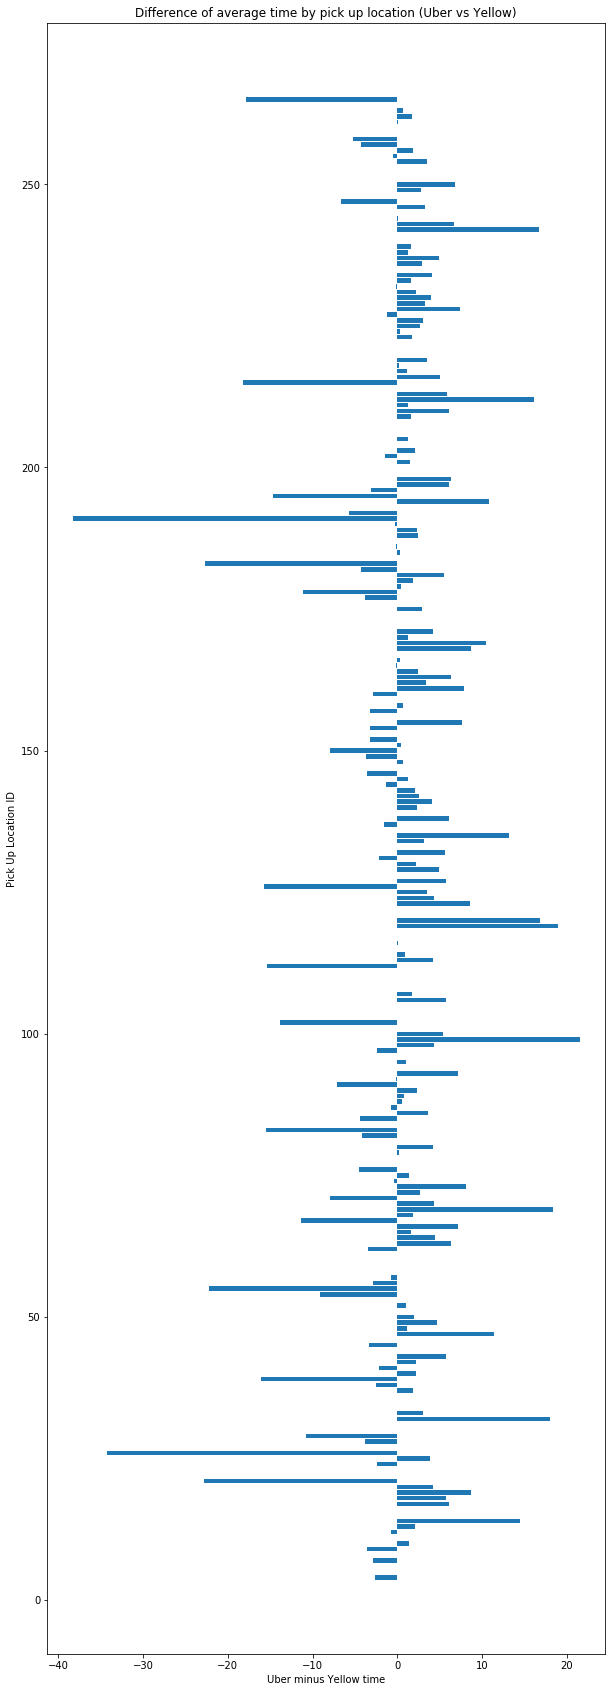

In [89]:

fig = plt.figure()
plt.figure(figsize=(10,30))
plt.barh(df_jfk_stats['PULocationID'],df_jfk_stats['mean_diff'])
plt.title('Difference of average time by pick up location (Uber vs Yellow)')
plt.xlabel('Uber minus Yellow time')
plt.ylabel('Pick Up Location ID')

In [90]:
# test for significance of difference in means

# test for difference in variance (F-test)


In [91]:
df_jfk_stats.head()

,PULocationID,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,count_y,mean_y,std_y,min_y,25%_y,50%_y,75%_y,max_y,mean_diff
0,4,55.0,53.023939,19.760940,22.466667,40.675000,47.550000,61.658333,106.316667,765.0,50.447778,18.355632,24.166667,36.066667,47.066667,60.516667,112.150000,-2.576162
1,7,68.0,38.172549,15.577116,17.600000,25.541667,35.491667,46.616667,82.733333,2087.0,35.349641,13.166746,16.466667,25.416667,32.033333,41.875000,93.616667,-2.822908
2,9,2.0,30.900000,2.027039,29.466667,30.183333,30.900000,31.616667,32.333333,335.0,27.331791,7.541530,14.383333,21.600000,25.950000,32.150000,57.800000,-3.568209
3,10,26.0,8.482692,3.307028,2.650000,6.295833,8.183333,10.225000,15.700000,4432.0,9.863752,4.204920,2.250000,7.350000,9.183333,11.500000,96.316667,1.381060
4,12,23.0,74.781884,21.485715,41.566667,53.025000,77.750000,92.750000,108.816667,18.0,73.980556,20.524069,39.800000,60.558333,74.450000,81.975000,114.400000,-0.801329


In [92]:
df_jfk_stats['tstat'] = df_jfk_stats['mean_diff']/((((df_jfk_stats['std_x']**2)/df_jfk_stats['count_x'])**(1/2))+
                                                  (((df_jfk_stats['std_y']**2)/df_jfk_stats['count_y'])**(1/2)))

In [93]:
df_jfk_stats['df'] = (df_jfk_stats['count_x']-1) + (df_jfk_stats['count_y']-1)

In [94]:
from scipy import stats

In [95]:
df_jfk_stats['p'] = 1 - stats.t.cdf(df_jfk_stats['tstat'],df=df_jfk_stats['df'])
df_jfk_stats['p2'] = stats.t.cdf(df_jfk_stats['tstat'],df=df_jfk_stats['df'])

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [96]:
df_jfk_stats.loc[df_jfk_stats['tstat']<0, 'pfinal'] = df_jfk_stats['p2']
df_jfk_stats.loc[df_jfk_stats['tstat']>0, 'pfinal'] = df_jfk_stats['p']

In [97]:
df_jfk_stats.loc[df_jfk_stats['pfinal']<0.05, '5%sig'] = 1
df_jfk_stats.loc[df_jfk_stats['pfinal']>0.05, '5%sig'] = 0

In [98]:
df_jfk_stats.head()

,PULocationID,count_x,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,count_y,...,50%_y,75%_y,max_y,mean_diff,tstat,df,p,p2,pfinal,5%sig
0,4,55.0,53.023939,19.760940,22.466667,40.675000,47.550000,61.658333,106.316667,765.0,...,47.066667,60.516667,112.150000,-2.576162,-0.774037,818.0,0.780434,0.219566,0.219566,0.0
1,7,68.0,38.172549,15.577116,17.600000,25.541667,35.491667,46.616667,82.733333,2087.0,...,32.033333,41.875000,93.616667,-2.822908,-1.296567,2153.0,0.902540,0.097460,0.097460,0.0
2,9,2.0,30.900000,2.027039,29.466667,30.183333,30.900000,31.616667,32.333333,335.0,...,25.950000,32.150000,57.800000,-3.568209,-1.933600,335.0,0.972998,0.027002,0.027002,1.0
3,10,26.0,8.482692,3.307028,2.650000,6.295833,8.183333,10.225000,15.700000,4432.0,...,9.183333,11.500000,96.316667,1.381060,1.940444,4456.0,0.026194,0.973806,0.026194,1.0
4,12,23.0,74.781884,21.485715,41.566667,53.025000,77.750000,92.750000,108.816667,18.0,...,74.450000,81.975000,114.400000,-0.801329,-0.086001,39.0,0.534047,0.465953,0.465953,0.0


Text(0, 0.5, 'P-value')

<Figure size 432x288 with 0 Axes>

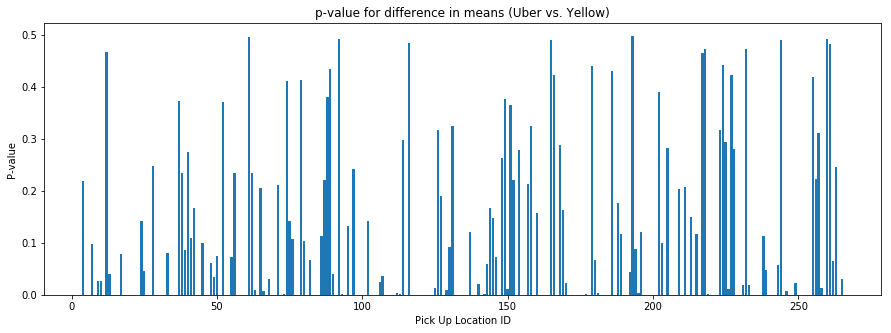

In [99]:

fig = plt.figure()
plt.figure(figsize=(15,5))
plt.bar(df_jfk_stats['PULocationID'],df_jfk_stats['pfinal'])
plt.title('p-value for difference in means (Uber vs. Yellow)')
plt.xlabel('Pick Up Location ID')
plt.ylabel('P-value')

Text(0, 0.5, 'Diff')

<Figure size 432x288 with 0 Axes>

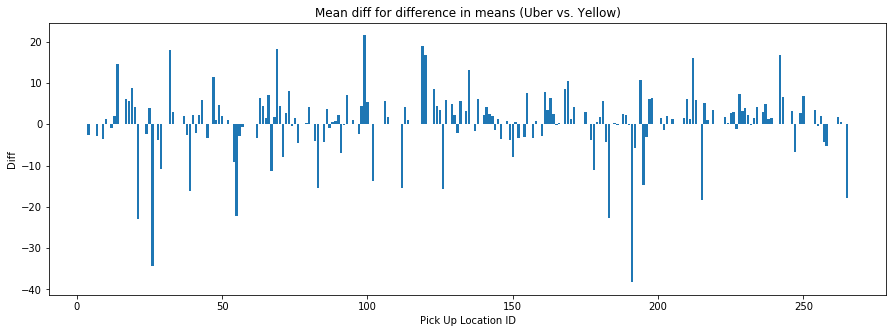

In [100]:

fig = plt.figure()
plt.figure(figsize=(15,5))
plt.bar(df_jfk_stats['PULocationID'],df_jfk_stats['mean_diff'])
plt.title('Mean diff for difference in means (Uber vs. Yellow)')
plt.xlabel('Pick Up Location ID')
plt.ylabel('Diff')

In [101]:
df_jfk_stats_sig = df_jfk_stats[(df_jfk_stats['5%sig']==1)]

Text(0, 0.5, 'Diff')

<Figure size 432x288 with 0 Axes>

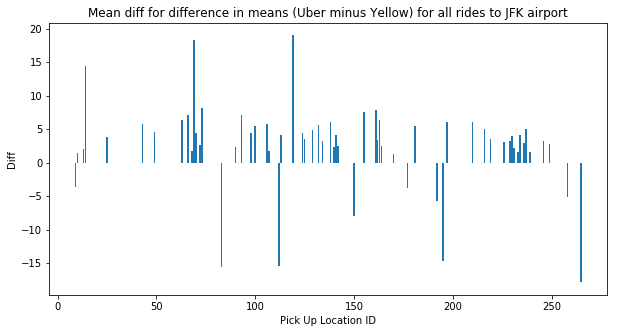

In [102]:


fig = plt.figure()
plt.figure(figsize=(10,5))
plt.bar(df_jfk_stats_sig['PULocationID'],df_jfk_stats_sig['mean_diff'])
plt.title('Mean diff for difference in means (Uber minus Yellow) for all rides to JFK airport')
plt.xlabel('Pick Up Location ID')
plt.ylabel('Diff')

In [103]:
zone_lookup = pd.read_csv("taxi+_zone_lookup.csv")

In [104]:
zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [105]:
df_jfk_stats_sig = pd.merge(df_jfk_stats_sig, zone_lookup,left_on='PULocationID',right_on='LocationID',how='left')

In [106]:
df_jfk_stats_sig[['count_x','mean_x','count_y','mean_y','mean_diff','Borough','Zone']]

,count_x,mean_x,count_y,mean_y,mean_diff,Borough,Zone
0,2.0,30.900000,335.0,27.331791,-3.568209,Queens,Auburndale
1,26.0,8.482692,4432.0,9.863752,1.381060,Queens,Baisley Park
2,865.0,58.599461,1530.0,60.669619,2.070158,Manhattan,Battery Park City
3,3.0,28.750000,848.0,43.233078,14.483078,Brooklyn,Bay Ridge
4,44.0,43.324242,1683.0,47.164815,3.840572,Brooklyn,Boerum Hill
5,760.0,54.067039,618.0,59.831176,5.764136,Manhattan,Central Park
6,17.0,37.009804,1840.0,41.637835,4.628031,Brooklyn,Clinton Hill
7,3.0,11.688889,954.0,18.065217,6.376328,Brooklyn,Cypress Hills
8,53.0,46.305660,1021.0,53.410464,7.104803,Brooklyn,DUMBO/Vinegar Hill
9,998.0,58.168871,3566.0,59.969391,1.800520,Manhattan,East Chelsea


In [174]:
df_jfk_stats_sig.to_csv('Sigresults_all.csv')

In [107]:
df_jfk_stats_sig_manhattan = df_jfk_stats_sig[(df_jfk_stats_sig['Borough']=='Manhattan')]

df_jfk_stats_sig_manhattan[['count_x','mean_x','count_y','mean_y','mean_diff','Borough','Zone']]

,count_x,mean_x,count_y,mean_y,mean_diff,Borough,Zone
2,865.0,58.599461,1530.0,60.669619,2.070158,Manhattan,Battery Park City
5,760.0,54.067039,618.0,59.831176,5.764136,Manhattan,Central Park
9,998.0,58.168871,3566.0,59.969391,1.800520,Manhattan,East Chelsea
15,613.0,57.151169,2090.0,59.504362,2.353193,Manhattan,Flatiron
18,1409.0,54.659392,2024.0,60.080427,5.421035,Manhattan,Garment District
20,1225.0,49.682558,2801.0,51.362829,1.680271,Manhattan,Gramercy
22,575.0,55.727565,1835.0,59.915304,4.187739,Manhattan,Greenwich Village North
25,372.0,60.272088,1206.0,63.804022,3.531934,Manhattan,Hudson Sq
30,742.0,47.279537,1451.0,49.563830,2.284292,Manhattan,Lenox Hill East
31,894.0,46.588609,2282.0,50.725723,4.137114,Manhattan,Lenox Hill West


In [108]:
df_jfk_stats_sig_manhattan['mean_diff'].mean()

3.3795591184284777

In [109]:
 dftimecompany.head()

,pickup_datetime_dt,dropoff_datetime_dt,PULocationID,DOLocationID,time,time_m,Company
0,2019-06-01 00:55:13,2019-06-01 00:56:17,145,145,00:01:04,1.066667,Yellow
1,2019-06-01 00:06:31,2019-06-01 00:06:52,262,263,00:00:21,0.350000,Yellow
2,2019-06-01 00:17:05,2019-06-01 00:36:38,74,7,00:19:33,19.550000,Yellow
3,2019-06-01 00:59:02,2019-06-01 00:59:12,145,145,00:00:10,0.166667,Yellow
4,2019-06-01 00:03:25,2019-06-01 00:15:42,113,148,00:12:17,12.283333,Yellow


In [110]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('time_m ~ Company',
                data=dftimecompany).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq          df              F  PR(>F)
Company   1.055315e+08         4.0  141034.957967     0.0
Residual  4.644901e+09  24830255.0            NaN     NaN


In [111]:
dftimecompany = pd.merge(dftimecompany, zone_lookup,left_on='PULocationID',right_on='LocationID',how='left')

In [112]:
pair_t = mod.t_test_pairwise('Company')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Lyft-Juno,3.203787,0.018072,177.282929,0.000000e+00,3.168368,3.239207,0.000000e+00,True
Uber-Juno,1.443699,0.017075,84.549991,0.000000e+00,1.410233,1.477166,0.000000e+00,True
Via-Juno,3.030116,0.029230,103.663333,0.000000e+00,2.972825,3.087406,0.000000e+00,True
Yellow-Juno,-2.547531,0.017449,-145.998546,0.000000e+00,-2.581730,-2.513332,0.000000e+00,True
Uber-Lyft,-1.760088,0.007968,-220.889019,0.000000e+00,-1.775705,-1.744470,0.000000e+00,True
Via-Lyft,-0.173672,0.025027,-6.939388,3.938110e-12,-0.222723,-0.124620,3.938072e-12,True
Yellow-Lyft,-5.751318,0.008741,-657.986332,0.000000e+00,-5.768450,-5.734187,0.000000e+00,True
Via-Uber,1.586416,0.024317,65.238635,0.000000e+00,1.538756,1.634077,0.000000e+00,True
Yellow-Uber,-3.991230,0.006433,-620.476263,0.000000e+00,-4.003838,-3.978623,0.000000e+00,True
Yellow-Via,-5.577647,0.024581,-226.907668,0.000000e+00,-5.625825,-5.529469,0.000000e+00,True


In [113]:
dftimecompany['hour'] = dftimecompany['pickup_datetime_dt'].dt.hour

In [114]:
dftimecompany['weekday'] = dftimecompany['pickup_datetime_dt'].weekday

AttributeError: 'Series' object has no attribute 'weekday'

In [115]:
dftimecompany[(dftimecompany['Borough']=='Manhattan')].groupby(['hour'])['time_m'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,507381.0,15.973541,10.793650,0.0,8.366667,13.333333,20.816667,119.916667
1,359986.0,14.794852,9.693134,0.0,7.950000,12.600000,19.300000,119.633333
2,261447.0,14.470766,9.500959,0.0,7.766667,12.350000,18.900000,119.483333
3,182623.0,14.936468,9.728754,0.0,7.833333,12.816667,19.883333,118.100000
4,150797.0,16.482255,10.290355,0.0,8.366667,14.783333,22.850000,119.833333
5,160198.0,16.286987,11.082432,0.0,7.316667,13.633333,23.416667,119.866667
6,283419.0,14.740977,11.293610,0.0,6.666667,11.133333,19.566667,119.516667
7,459127.0,15.150175,11.413694,0.0,7.566667,12.033333,19.133333,119.450000
8,599917.0,16.415048,11.490651,0.0,8.450000,13.600000,21.166667,119.766667


In [116]:
 dftimecompany.head(50)

,pickup_datetime_dt,dropoff_datetime_dt,PULocationID,DOLocationID,time,time_m,Company,LocationID,Borough,Zone,service_zone,hour
0,2019-06-01 00:55:13,2019-06-01 00:56:17,145,145,00:01:04,1.066667,Yellow,145,Queens,Long Island City/Hunters Point,Boro Zone,0
1,2019-06-01 00:06:31,2019-06-01 00:06:52,262,263,00:00:21,0.350000,Yellow,262,Manhattan,Yorkville East,Yellow Zone,0
2,2019-06-01 00:17:05,2019-06-01 00:36:38,74,7,00:19:33,19.550000,Yellow,74,Manhattan,East Harlem North,Boro Zone,0
3,2019-06-01 00:59:02,2019-06-01 00:59:12,145,145,00:00:10,0.166667,Yellow,145,Queens,Long Island City/Hunters Point,Boro Zone,0
4,2019-06-01 00:03:25,2019-06-01 00:15:42,113,148,00:12:17,12.283333,Yellow,113,Manhattan,Greenwich Village North,Yellow Zone,0
5,2019-06-01 00:28:31,2019-06-01 00:39:23,79,125,00:10:52,10.866667,Yellow,79,Manhattan,East Village,Yellow Zone,0
6,2019-06-01 00:46:46,2019-06-01 00:50:55,211,148,00:04:09,4.150000,Yellow,211,Manhattan,SoHo,Yellow Zone,0
7,2019-06-01 00:54:49,2019-06-01 01:02:57,79,249,00:08:08,8.133333,Yellow,79,Manhattan,East Village,Yellow Zone,0
8,2019-06-01 00:09:57,2019-06-01 00:25:54,158,68,00:15:57,15.950000,Yellow,158,Manhattan,Meatpacking/West Village West,Yellow Zone,0
9,2019-06-01 00:29:12,2019-06-01 01:03:13,186,243,00:34:01,34.016667,Yellow,186,Manhattan,Penn Station/Madison Sq West,Yellow Zone,0


In [117]:
df_jfk_ULY['hour'] = df_jfk_ULY['pickup_datetime_dt'].dt.hour

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
df_jfk_ULY['rush_hour'] = df_jfk_ULY.apply(lambda x: 0 if x['hour']<16 else (1 if x['hour']<20 else 0), axis=1)

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
df_jfk_ULY['weekday'] = df_jfk_ULY['pickup_datetime_dt'].dt.dayofweek

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
df_jfk_ULY['rush_hour'] = df_jfk_ULY.apply(lambda x: 0 if x['weekday']>4 else x['rush_hour'], axis=1)

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [121]:
df_jfk_ULY = pd.merge(df_jfk_ULY, zone_lookup,left_on='PULocationID',right_on='LocationID',how='left')

In [122]:
df_jfk_ULY[(df_jfk_ULY['Borough'] == 'Manhattan')].groupby(['Company'])['time_m'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Uber,116325.0,55.634608,20.602765,13.733333,39.333333,52.066667,68.383333,119.983333
Yellow,53865.0,53.364744,19.190278,0.066667,38.783333,51.066667,65.600000,119.816667


In [123]:
df_jfk_ULY[(df_jfk_ULY['Borough'] == 'Manhattan')].groupby(['rush_hour','Company'])['time_m'].describe()

count       mean        std        min        25%  \
rush_hour Company                                                        
0         Uber     99031.0  52.091938  18.865333  13.733333  37.450000   
          Yellow   44706.0  49.888236  17.679272   0.166667  36.416667   
1         Uber     17294.0  75.921075  18.268883  30.750000  61.833333   
          Yellow    9159.0  70.333928  17.125208   0.066667  57.966667   

                         50%        75%         max  
rush_hour Company                                    
0         Uber     48.800000  62.566667  119.950000  
          Yellow   47.966667  60.200000  119.816667  
1         Uber     76.308333  89.333333  119.983333  
          Yellow   70.900000  81.816667  119.766667

In [124]:
df_JFK_ULY_man = df_jfk_ULY[(df_jfk_ULY['Borough'] == 'Manhattan')]

In [125]:
 model = ols('time_m ~ C(rush_hour)*C(Company)', df_JFK_ULY_man).fit()
   

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 time_m   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                 1.154e+04
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:08:23   Log-Likelihood:            -7.3722e+05
No. Observations:              170190   AIC:                         1.474e+06
Df Residuals:                  170186   BIC:                         1.474e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 52.0919      0.058    890.480      0.000      51.977      52.207
C(rush_hour)[T.1]                         23.8291      0.152    157.063      0.000      23.532      24.126
C(Company)[T.Yellow]                      -2.2037      0.105    -21.009      0.000      -2.409      -1.998
C(rush_hour)[T.1]:C(Company)[T.Yellow]    -3.3834      0.260    -13.013      0.000      -3.893      -2.874
==============================================================================
Omnibus:                    12171.728   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14937.085
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                       3.259   Cond. No.                         6.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(rush_hour),1.148037e+07,1.0,33875.957518,0.000000e+00
C(Company),2.791071e+05,1.0,823.581628,1.090100e-180
C(rush_hour):C(Company),5.739000e+04,1.0,169.344837,1.073399e-38
Residual,5.767507e+07,170186.0,NaN,NaN


In [128]:
model2 = ols('time_m ~ C(rush_hour)+C(Company)', df_JFK_ULY_man).fit()

In [129]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 time_m   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                 1.720e+04
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:08:25   Log-Likelihood:            -7.3731e+05
No. Observations:              170190   AIC:                         1.475e+06
Df Residuals:                  170187   BIC:                         1.475e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               52.2632      0.057    916.464      0.000      52.151      52.375
C(rush_hour)[T.1]       22.6771      0.123    183.963      0.000      22.435      22.919
C(Company)[T.Yellow]    -2.7544      0.096    -28.684      0.000      -2.943      -2.566
==============================================================================
Omnibus:                    12115.846   Durbin-Watson:                   0.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14856.059
Skew:                           0.713   Prob(JB):                         0.00
Kurtosis:                       3.250   Cond. No.                         3.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
res2 = sm.stats.anova_lm(model2, typ= 2)
res2

,sum_sq,df,F,PR(>F)
C(rush_hour),1.148037e+07,1.0,33842.481359,0.000000e+00
C(Company),2.791071e+05,1.0,822.767766,1.635136e-180
Residual,5.773246e+07,170187.0,NaN,NaN


In [131]:
df_jfk_ULY['late_night'] = df_jfk_ULY.apply(lambda x: 1 if x['hour']<6 else 0, axis=1)

In [132]:
df_jfk_ULY[(df_jfk_ULY['Borough'] == 'Manhattan')].groupby(['late_night','Company'])['time_m'].describe()

count       mean        std        min        25%  \
late_night Company                                                         
0          Uber     100306.0  59.150763  19.877391  20.200000  44.016667   
           Yellow    49086.0  55.745772  18.353253   0.066667  42.200000   
1          Uber      16019.0  33.617543   6.795004  13.733333  28.866667   
           Yellow     4779.0  28.908761   5.891767   2.900000  25.200000   

                          50%    75%         max  
late_night Company                                
0          Uber     55.700000  71.80  119.983333  
           Yellow   53.175000  67.35  119.816667  
1          Uber     32.416667  37.05  110.133333  
           Yellow   28.033333  31.65  104.650000

In [133]:
df_JFK_ULY_man = df_jfk_ULY[(df_jfk_ULY['Borough'] == 'Manhattan')]

In [134]:
model_LN = ols('time_m ~ C(late_night)*C(Company)', df_JFK_ULY_man).fit()
model_LN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 time_m   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                 1.226e+04
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:08:39   Log-Likelihood:            -7.3633e+05
No. Observations:              170190   AIC:                         1.473e+06
Df Residuals:                  170186   BIC:                         1.473e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  59.1508      0.058   1023.006      0.000      59.037      59.264
C(late_night)[T.1]                        -25.5332      0.156   -163.872      0.000     -25.839     -25.228
C(Company)[T.Yellow]                       -3.4050      0.101    -33.756      0.000      -3.603      -3.207
C(late_night)[T.1]:C(Company)[T.Yellow]    -1.3038      0.318     -4.097      0.000      -1.928      -0.680
==============================================================================
Omnibus:                     9950.335   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11789.569
Skew:                           0.641   Prob(JB):                         0.00
Kurtosis:                       3.147   Cond. No.                         7.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
res_LN = sm.stats.anova_lm(model_LN, typ= 2)
res_LN

,sum_sq,df,F,PR(>F)
C(late_night),1.213630e+07,1.0,36190.560443,0.000000e+00
C(Company),4.580967e+05,1.0,1366.048981,7.691928e-298
C(late_night):C(Company),5.628411e+03,1.0,16.783977,4.190486e-05
Residual,5.707090e+07,170186.0,NaN,NaN


In [136]:
model_LN2 = ols('time_m ~ C(late_night)+C(Company)', df_JFK_ULY_man).fit()
model_LN2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 time_m   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                 1.838e+04
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:08:41   Log-Likelihood:            -7.3634e+05
No. Observations:              170190   AIC:                         1.473e+06
Df Residuals:                  170187   BIC:                         1.473e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               59.1938      0.057   1041.030      0.000      59.082      59.305
C(late_night)[T.1]     -25.8457      0.136   -190.229      0.000     -26.112     -25.579
C(Company)[T.Yellow]    -3.5360      0.096    -36.958      0.000      -3.723      -3.348
==============================================================================
Omnibus:                     9929.605   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11761.344
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       3.145   Cond. No.                         3.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
res_LN2 = sm.stats.anova_lm(model_LN2, typ= 2)
res_LN2

,sum_sq,df,F,PR(>F)
C(late_night),1.213630e+07,1.0,36187.204264,0.000000e+00
C(Company),4.580967e+05,1.0,1365.922298,8.191019e-298
Residual,5.707653e+07,170187.0,NaN,NaN


# Regression analysis on fares

In [138]:
# remove outliers

clean_df_sample = clean_df_sample[(clean_df_sample['trip_distance']!=0) & (clean_df_sample['fare_amount']!=52)]

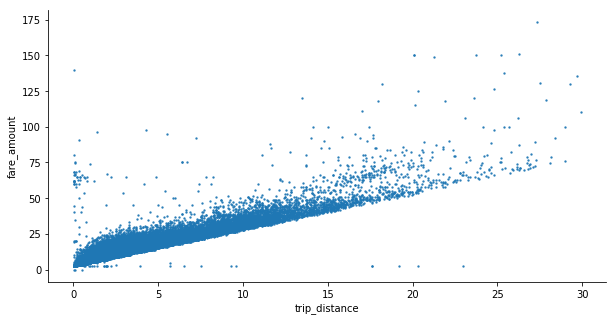

In [139]:
g = sns.regplot(x=clean_df_sample["trip_distance"], y=clean_df_sample["fare_amount"], fit_reg=False, scatter_kws={'s':2})

g.figure.set_size_inches(10, 5)
sns.despine()

In [140]:
import statsmodels.api as sm

In [141]:
model = sm.OLS(clean_df_sample["fare_amount"], sm.add_constant(clean_df_sample["trip_distance"]))
res = model.fit()
print(res.summary())
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 4.302e+05
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:15:16   Log-Likelihood:            -1.7859e+05
No. Observations:               66711   AIC:                         3.572e+05
Df Residuals:                   66709   BIC:                         3.572e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3658      0.018    238.958

In [142]:
# Coefficient above is 2.8 per mile. 
# Officially (https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page), 
# Flat rate of $2.5 plus
# 50 cents per 1/5 mile or $2.5 per mile plus other surcharges


Text(0, 0.5, 'Fare amount')

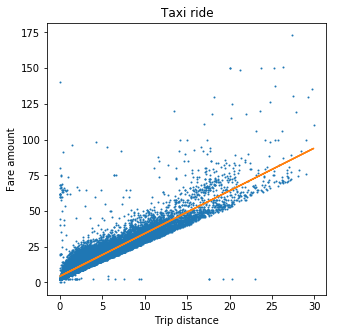

In [143]:
# plotting the data:
plt.figure(figsize=(5,5))
plt.plot(clean_df_sample["trip_distance"], clean_df_sample["fare_amount"], 'o',markersize=1)
# plt.show()
# this is to plot regression line on the plot
model = sm.OLS(clean_df_sample["fare_amount"], sm.add_constant(clean_df_sample["trip_distance"])).fit()
X = clean_df_sample["trip_distance"].values

plt.plot(X, model.predict(np.array([np.ones(len(X)), X]).T))
# plt.show()
plt.title('Taxi ride')
plt.xlabel('Trip distance')
plt.ylabel('Fare amount')



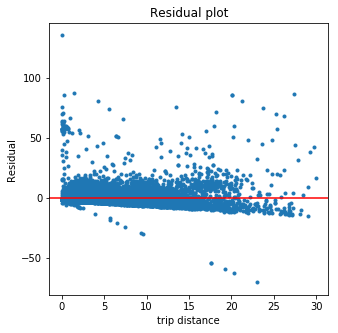

In [144]:
plt.figure(figsize=(5,5))
plt.plot(clean_df_sample["trip_distance"], model.resid, '.' )
plt.axhline(y=0, color='r')
plt.title('Residual plot')
plt.xlabel('trip distance')
plt.ylabel('Residual')
plt.show()

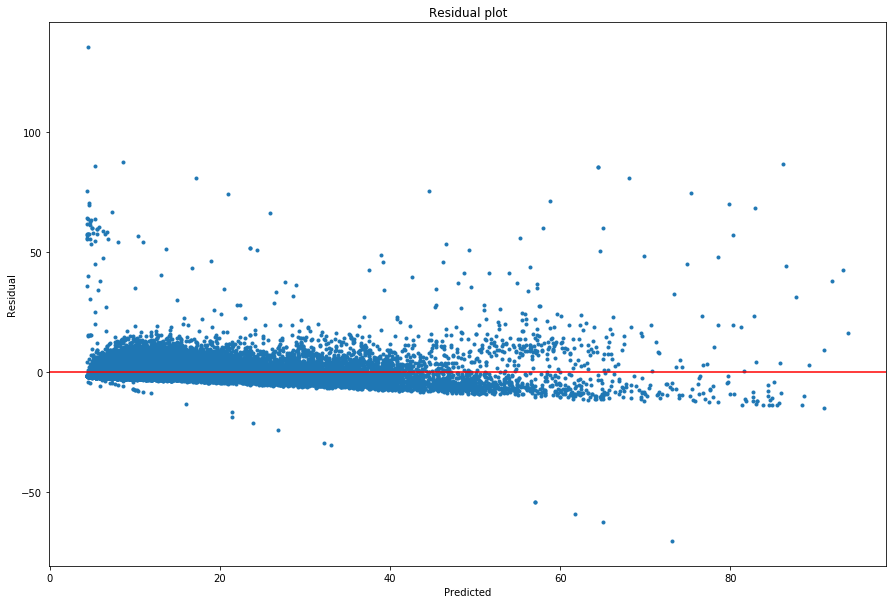

In [145]:
plt.figure(figsize=(15,10))
plt.plot(model.predict(), model.resid, '.' )
plt.axhline(y=0, color='r')
plt.title('Residual plot')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

In [146]:
# Residuals appear to get bigger 

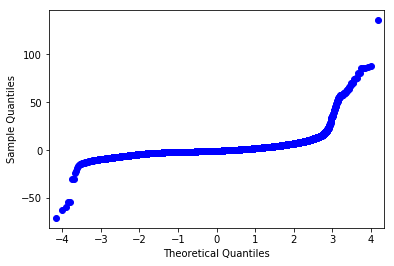

In [147]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data =  model.resid)
plt.show()

In [148]:
## qq plot appears to show presence of tails

In [149]:
clean_df_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,%tip
4335167,2,2019-06-19 17:11:57,2019-06-19 17:20:41,1,0.77,1,N,107,170,1,7.0,1.0,0.5,2.26,0.0,0.3,13.56,2.5,0.166667
4699954,2,2019-06-21 02:26:52,2019-06-21 02:40:38,1,4.75,1,N,263,260,2,15.0,0.5,0.5,0.00,0.0,0.3,18.80,2.5,0.000000
6783103,1,2019-06-30 00:26:25,2019-06-30 00:33:09,1,0.90,1,N,186,170,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0.130435
492794,1,2019-06-03 08:02:10,2019-06-03 08:12:22,1,1.60,1,N,163,236,1,8.5,2.5,0.5,2.95,0.0,0.3,14.75,2.5,0.200000
5045865,1,2019-06-22 15:16:34,2019-06-22 15:28:46,1,1.90,1,N,186,158,1,10.0,2.5,0.5,2.00,0.0,0.3,15.30,2.5,0.130719


In [150]:
# add time variable
clean_df_sample['tpep_pickup_datetime_dt'] =  pd.to_datetime( clean_df_sample['tpep_pickup_datetime'])
clean_df_sample['tpep_dropoff_datetime_dt']  =  pd.to_datetime(clean_df_sample['tpep_dropoff_datetime'])

clean_df_sample['time'] = clean_df_sample['tpep_dropoff_datetime_dt'] - clean_df_sample['tpep_pickup_datetime_dt']



In [151]:
clean_df_sample['time_m'] = clean_df_sample['time'].dt.total_seconds().div(60).astype(float)

In [152]:
clean_df_sample.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', '%tip',
       'tpep_pickup_datetime_dt', 'tpep_dropoff_datetime_dt', 'time',
       'time_m'],
      dtype='object')

In [153]:
from pandas.plotting import scatter_matrix

In [154]:

df_mreg = clean_df_sample[['passenger_count','trip_distance','fare_amount','extra','tip_amount',
                               'tolls_amount','total_amount',
                               '%tip', 'time_m']].sample(n=1000, random_state=1)


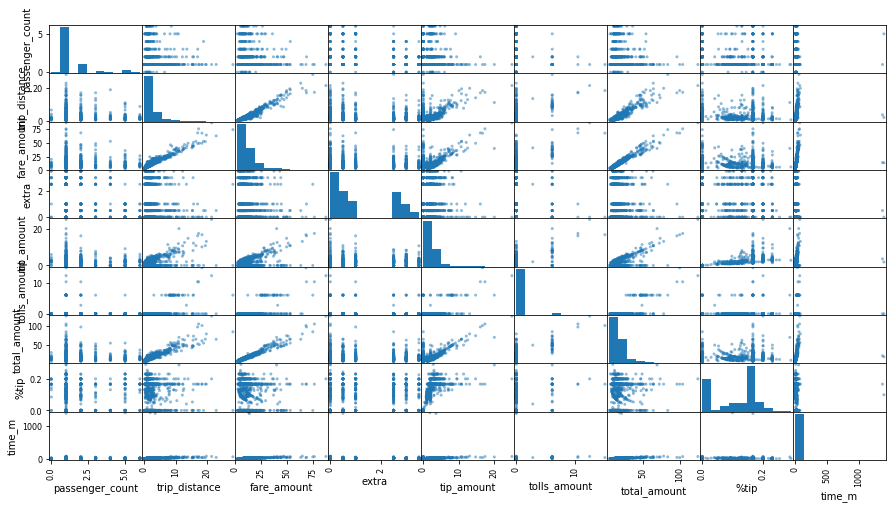

In [155]:

scatter_matrix(df_mreg,figsize=(15,8))
plt.show()

In [156]:

df_mreg = clean_df_sample[['trip_distance','fare_amount','time_m','passenger_count','tip_amount']]
df_mreg.describe()



,trip_distance,fare_amount,time_m,passenger_count,tip_amount
count,66711.000000,66711.000000,66711.000000,66711.000000,66711.000000
mean,2.669086,12.349108,17.380207,1.565874,2.073995
std,2.987721,9.604292,67.625704,1.209642,2.315005
min,0.010000,0.010000,0.000000,0.000000,0.000000
25%,1.000000,6.500000,6.866667,1.000000,0.000000
50%,1.640000,9.500000,11.400000,1.000000,1.920000
75%,2.970000,14.500000,18.383333,2.000000,2.950000
max,29.920000,173.000000,1439.416667,7.000000,61.240000


In [157]:
df_mreg = df_mreg[(df_mreg['time_m']<120)]
df_mreg.describe()

,trip_distance,fare_amount,time_m,passenger_count,tip_amount
count,66543.000000,66543.000000,66543.000000,66543.000000,66543.000000
mean,2.664305,12.329822,14.136371,1.565138,2.073790
std,2.980342,9.555125,10.567084,1.208604,2.313514
min,0.010000,0.010000,0.000000,0.000000,0.000000
25%,1.000000,6.500000,6.866667,1.000000,0.000000
50%,1.640000,9.500000,11.366667,1.000000,1.930000
75%,2.970000,14.500000,18.316667,2.000000,2.950000
max,29.920000,173.000000,115.600000,7.000000,61.240000


In [158]:
df_mreg.corr()

,trip_distance,fare_amount,time_m,passenger_count,tip_amount
trip_distance,1.000000,0.930730,0.769362,0.006027,0.488877
fare_amount,0.930730,1.000000,0.869584,0.008439,0.528586
time_m,0.769362,0.869584,1.000000,0.008373,0.461754
passenger_count,0.006027,0.008439,0.008373,1.000000,-0.006103
tip_amount,0.488877,0.528586,0.461754,-0.006103,1.000000


In [159]:
df_mreg = df_mreg[['fare_amount','trip_distance','time_m']]

In [160]:
from statsmodels.formula.api import ols

In [161]:
model = ols('fare_amount ~ trip_distance + time_m', data = df_mreg).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 4.045e+05
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:15:25   Log-Likelihood:            -1.5887e+05
No. Observations:               66543   AIC:                         3.177e+05
Df Residuals:                   66540   BIC:                         3.178e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0432      0.017    118.850

In [162]:
import statsmodels.api as sm

In [163]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
trip_distance,1.0,5.262786e+06,5.262786e+06,758514.252591,0.0
time_m,1.0,3.508532e+05,3.508532e+05,50567.735442,0.0
Residual,66540.0,4.616733e+05,6.938282e+00,NaN,NaN


In [164]:
res = model.resid
pred = model.predict()

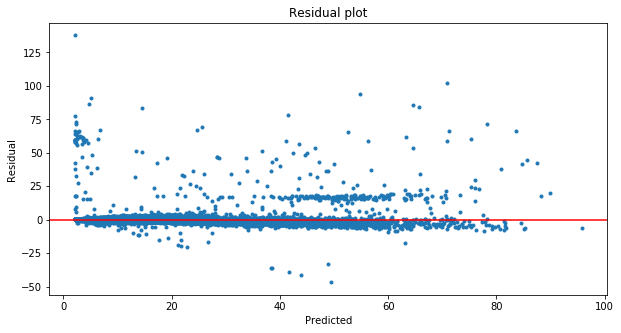

In [165]:
plt.figure(figsize=(10,5))
plt.plot(model.predict(), model.resid, '.' )
plt.axhline(y=0, color='r')
plt.title('Residual plot')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

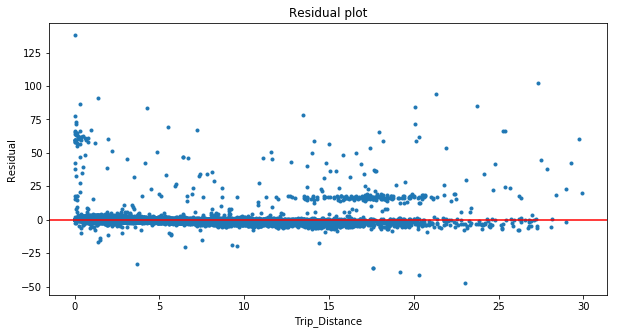

In [166]:
plt.figure(figsize=(10,5))
plt.plot(df_mreg['trip_distance'], model.resid, '.' )
plt.axhline(y=0, color='r')
plt.title('Residual plot')
plt.xlabel('Trip_Distance')
plt.ylabel('Residual')
plt.show()

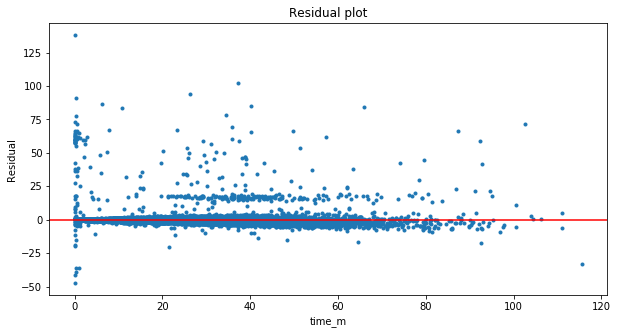

In [167]:
plt.figure(figsize=(10,5))
plt.plot(df_mreg['time_m'], model.resid, '.' )
plt.axhline(y=0, color='r')
plt.title('Residual plot')
plt.xlabel('time_m')
plt.ylabel('Residual')
plt.show()

Text(0, 0.5, 'Fare amount')

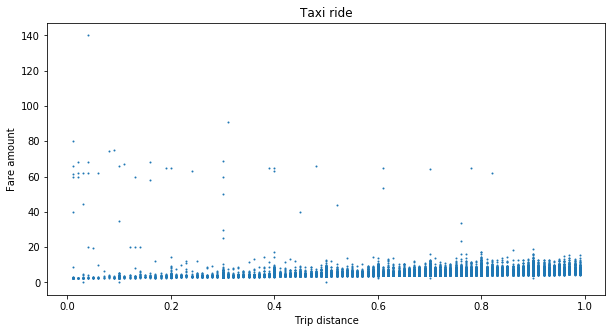

In [168]:
# appears to be some outliers at smaller values of time_m and trip_distance
df_mreg_small = df_mreg[(df_mreg['trip_distance']<1)]
plt.figure(figsize=(10,5))
plt.plot(df_mreg_small["trip_distance"], df_mreg_small["fare_amount"], 'o',markersize=1)
plt.title('Taxi ride')
plt.xlabel('Trip distance')
plt.ylabel('Fare amount')


Text(0, 0.5, 'Fare amount')

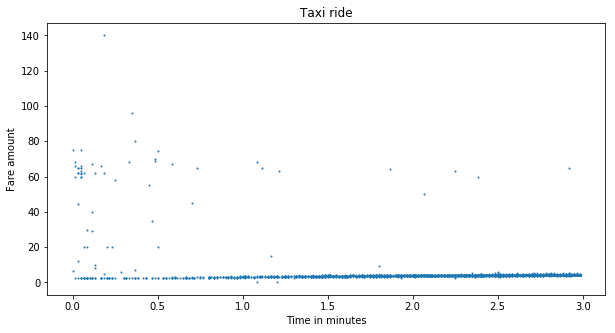

In [169]:
df_mreg_small = df_mreg[(df_mreg['time_m']<3)]
plt.figure(figsize=(10,5))
plt.plot(df_mreg_small["time_m"], df_mreg_small["fare_amount"], 'o',markersize=1)
plt.title('Taxi ride')
plt.xlabel('Time in minutes')
plt.ylabel('Fare amount')

In [170]:
#remove small values
df_mreg_clean = df_mreg[(df_mreg['time_m']>1.5) & (df_mreg['trip_distance']>0.3)]

In [171]:
model = ols('fare_amount ~ trip_distance + time_m', data = df_mreg_clean).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 6.316e+05
Date:                Sat, 14 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:15:26   Log-Likelihood:            -1.4134e+05
No. Observations:               65396   AIC:                         2.827e+05
Df Residuals:                   65393   BIC:                         2.827e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9353      0.014    138.332

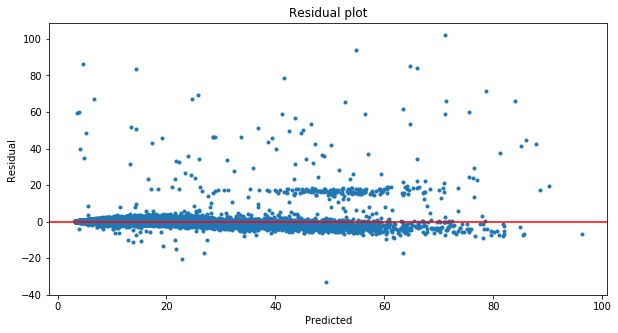

In [172]:
plt.figure(figsize=(10,5))
plt.plot(model.predict(), model.resid, '.' )
plt.axhline(y=0, color='r')
plt.title('Residual plot')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

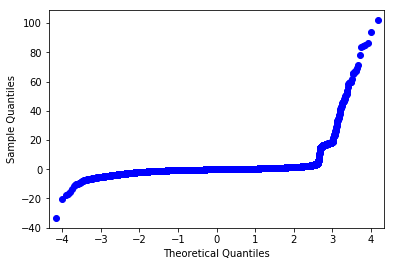

In [173]:
qqplot(data =  model.resid)
plt.show()